In [11]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os


In [12]:
#cargar datos
mist=keras.datasets.mnist
(train_imagenes,train_labels),(test_imagenes,test_labels)=mist.load_data()

In [13]:
#normalizar datos.
train_imagenes=train_imagenes/255.0
test_imagenes=test_imagenes/255.0

In [17]:
#construir el modelo de calsificacion.
model=keras.Sequential([
    keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
#redes neuronales normales.
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               692352    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [19]:
#compilar el modelo
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Epoch 1/10
1875/1875 [==============================] - 54s 26ms/step - loss: 0.1491 - accuracy: 0.9564
Epoch 2/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0519 - accuracy: 0.9845
Epoch 3/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0337 - accuracy: 0.9897
Epoch 4/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0223 - accuracy: 0.9932
Epoch 5/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0156 - accuracy: 0.9950
Epoch 6/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0109 - accuracy: 0.9964
Epoch 7/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0086 - accuracy: 0.9970
Epoch 8/10
1875/1875 [==============================] - 40s 22ms/step - loss: 0.0060 - accuracy: 0.9980
Epoch 9/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0059 - accuracy: 0.9981
Epoch 10/10
1875/1875 [==============================] - 42s 22m

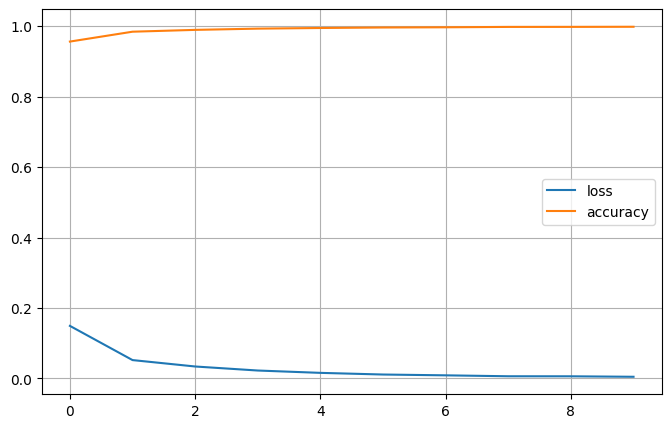

In [20]:
#entrenar el modelo.
history=model.fit(train_imagenes,train_labels,epochs=10)

#Graficar el historial de entrenamiento.
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)


In [21]:
# Evaluar el modelo en el conjunto de entrenamineto.
loss,accuracy=model.evaluate(train_imagenes,train_labels)
print("perdida en el conjunto de entrenamiento :",loss)
print("precision en el conjunto de entrenamiento :",accuracy)

1875/1875 [==============================] - 16s 8ms/step - loss: 0.0041 - accuracy: 0.9987
perdida en el conjunto de entrenamiento : 0.004080131649971008
precision en el conjunto de entrenamiento : 0.9987166523933411


In [32]:
# Evaluar el modelo en el conjunto de test.
loss,accuracy=model.evaluate(test_imagenes,test_labels)
print("perdida en el conjunto de entrenamiento :",loss)
print("precision en el conjunto de entrenamiento :",accuracy)

313/313 [==============================] - 2s 7ms/step - loss: 0.0664 - accuracy: 0.9854
perdida en el conjunto de entrenamiento : 0.06643438339233398
precision en el conjunto de entrenamiento : 0.9854000210762024


In [37]:
#prediccion
index=(2)
print(f"label:{test_labels[index]}")
classificacion=model.predict(test_imagenes[index : index+1])
print(f"classificacion:/n{classificacion.reshape(-1,1)}")

label:1
1/1 [==============================] - 0s 46ms/step
classificacion:/n[[6.0900542e-09]
 [1.0000000e+00]
 [8.7268647e-12]
 [6.0849648e-14]
 [4.4100726e-10]
 [1.7047031e-13]
 [1.5759630e-11]
 [3.0764877e-08]
 [7.1455136e-10]
 [1.3085629e-13]]


In [35]:
print(test_labels[:30])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]


In [51]:
FIRST_IMAGEN=2
SECOND_IMAGEN=5
THIRD_IMAGEN=14

print(test_labels[FIRST_IMAGEN])
print(test_labels[SECOND_IMAGEN])
print(test_labels[THIRD_IMAGEN])

1
1
1


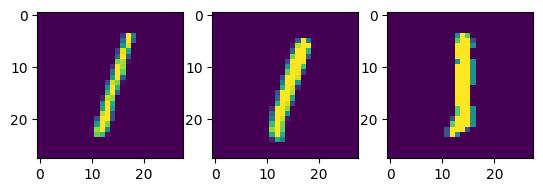

In [52]:
f,ax=plt.subplots(1,3)
ax[0].imshow(test_imagenes[FIRST_IMAGEN])
ax[1].imshow(test_imagenes[SECOND_IMAGEN])
ax[2].imshow(test_imagenes[THIRD_IMAGEN])

In [53]:
layer = 0
filter1=0
filter2=10
layer_outputs=[layer.output for layer in model.layers]
activation_model=keras.models.Model(inputs=model.input,outputs=layer_outputs)


1/1 [==============================] - 0s 25ms/step


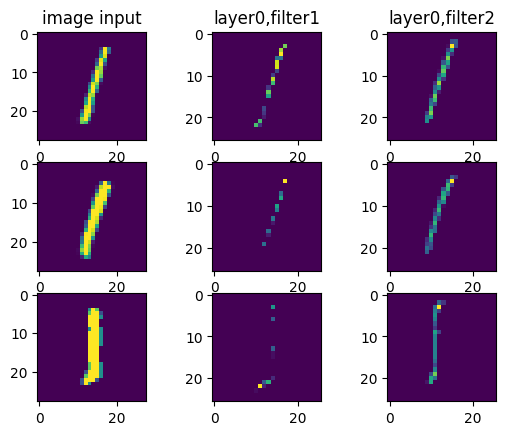

In [54]:
f,ax=plt.subplots(3,3)
ax[0,0].set_title("image input")
ax[0,0].imshow(test_imagenes[FIRST_IMAGEN])
f1=activation_model.predict(test_imagenes[FIRST_IMAGEN].reshape(1,28,28,1))[layer]
ax[0,1].set_title("layer"+str(layer)+",filter1")
ax[0,1].imshow(f1[0,:,:,filter1])
ax[0,2].set_title("layer"+str(layer)+",filter2")
ax[0,2].imshow(f1[0,:,:,filter2])
ax[1,0].imshow(test_imagenes[SECOND_IMAGEN])
f2=activation_model.predict(test_imagenes[SECOND_IMAGEN].reshape(1,28,28,1))[layer]
ax[1,1].imshow(f2[0,:,:,filter1])
ax[1,2].imshow(f2[0,:,:,filter2])
ax[2,0].imshow(test_imagenes[THIRD_IMAGEN])
f3=activation_model.predict(test_imagenes[THIRD_IMAGEN].reshape(1,28,28,1))[layer]
ax[2,1].imshow(f3[0,:,:,filter1])
ax[2,2].imshow(f3[0,:,:,filter2])
